In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv(r"C:\Users\kushi\Downloads\credit.csv")
data.head()


,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

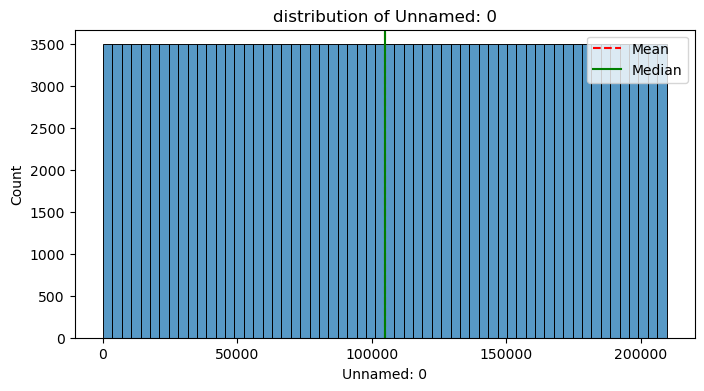

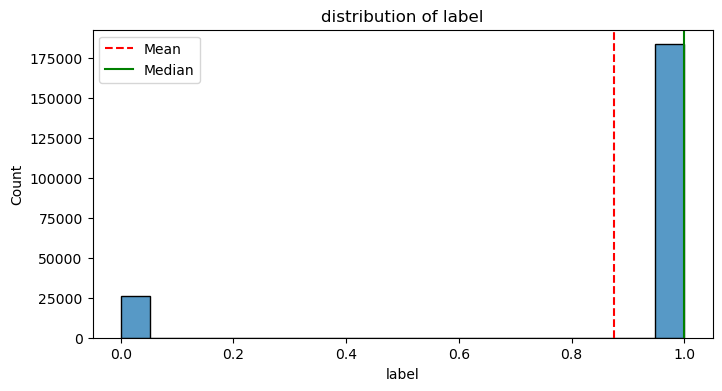

In [ ]:

for column in data.columns:
    plt.figure(figsize=(8,4))
    if data[column].dtype == 'object':
        sns.countplot(x=data[column])
    else:
        sns.histplot(data[column],bins='auto')
        plt.axvline(data[column].mean(),color='r',linestyle='--',label='Mean')
        plt.axvline(data[column].median(),color='g',linestyle='-',label='Median')
        plt.legend()
    plt.title(f"distribution of {column}")
plt.show()



In [3]:
data.info


<bound method DataFrame.info of         Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  las

In [4]:
data.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [5]:
from sklearn.preprocessing import LabelEncoder


In [6]:
le=LabelEncoder()
data['msisdn']=le.fit_transform(data['msisdn'])

In [7]:
data['pcircle']=le.fit_transform(data['pcircle'])

In [8]:
data['pdate']=le.fit_transform(data['pdate'])

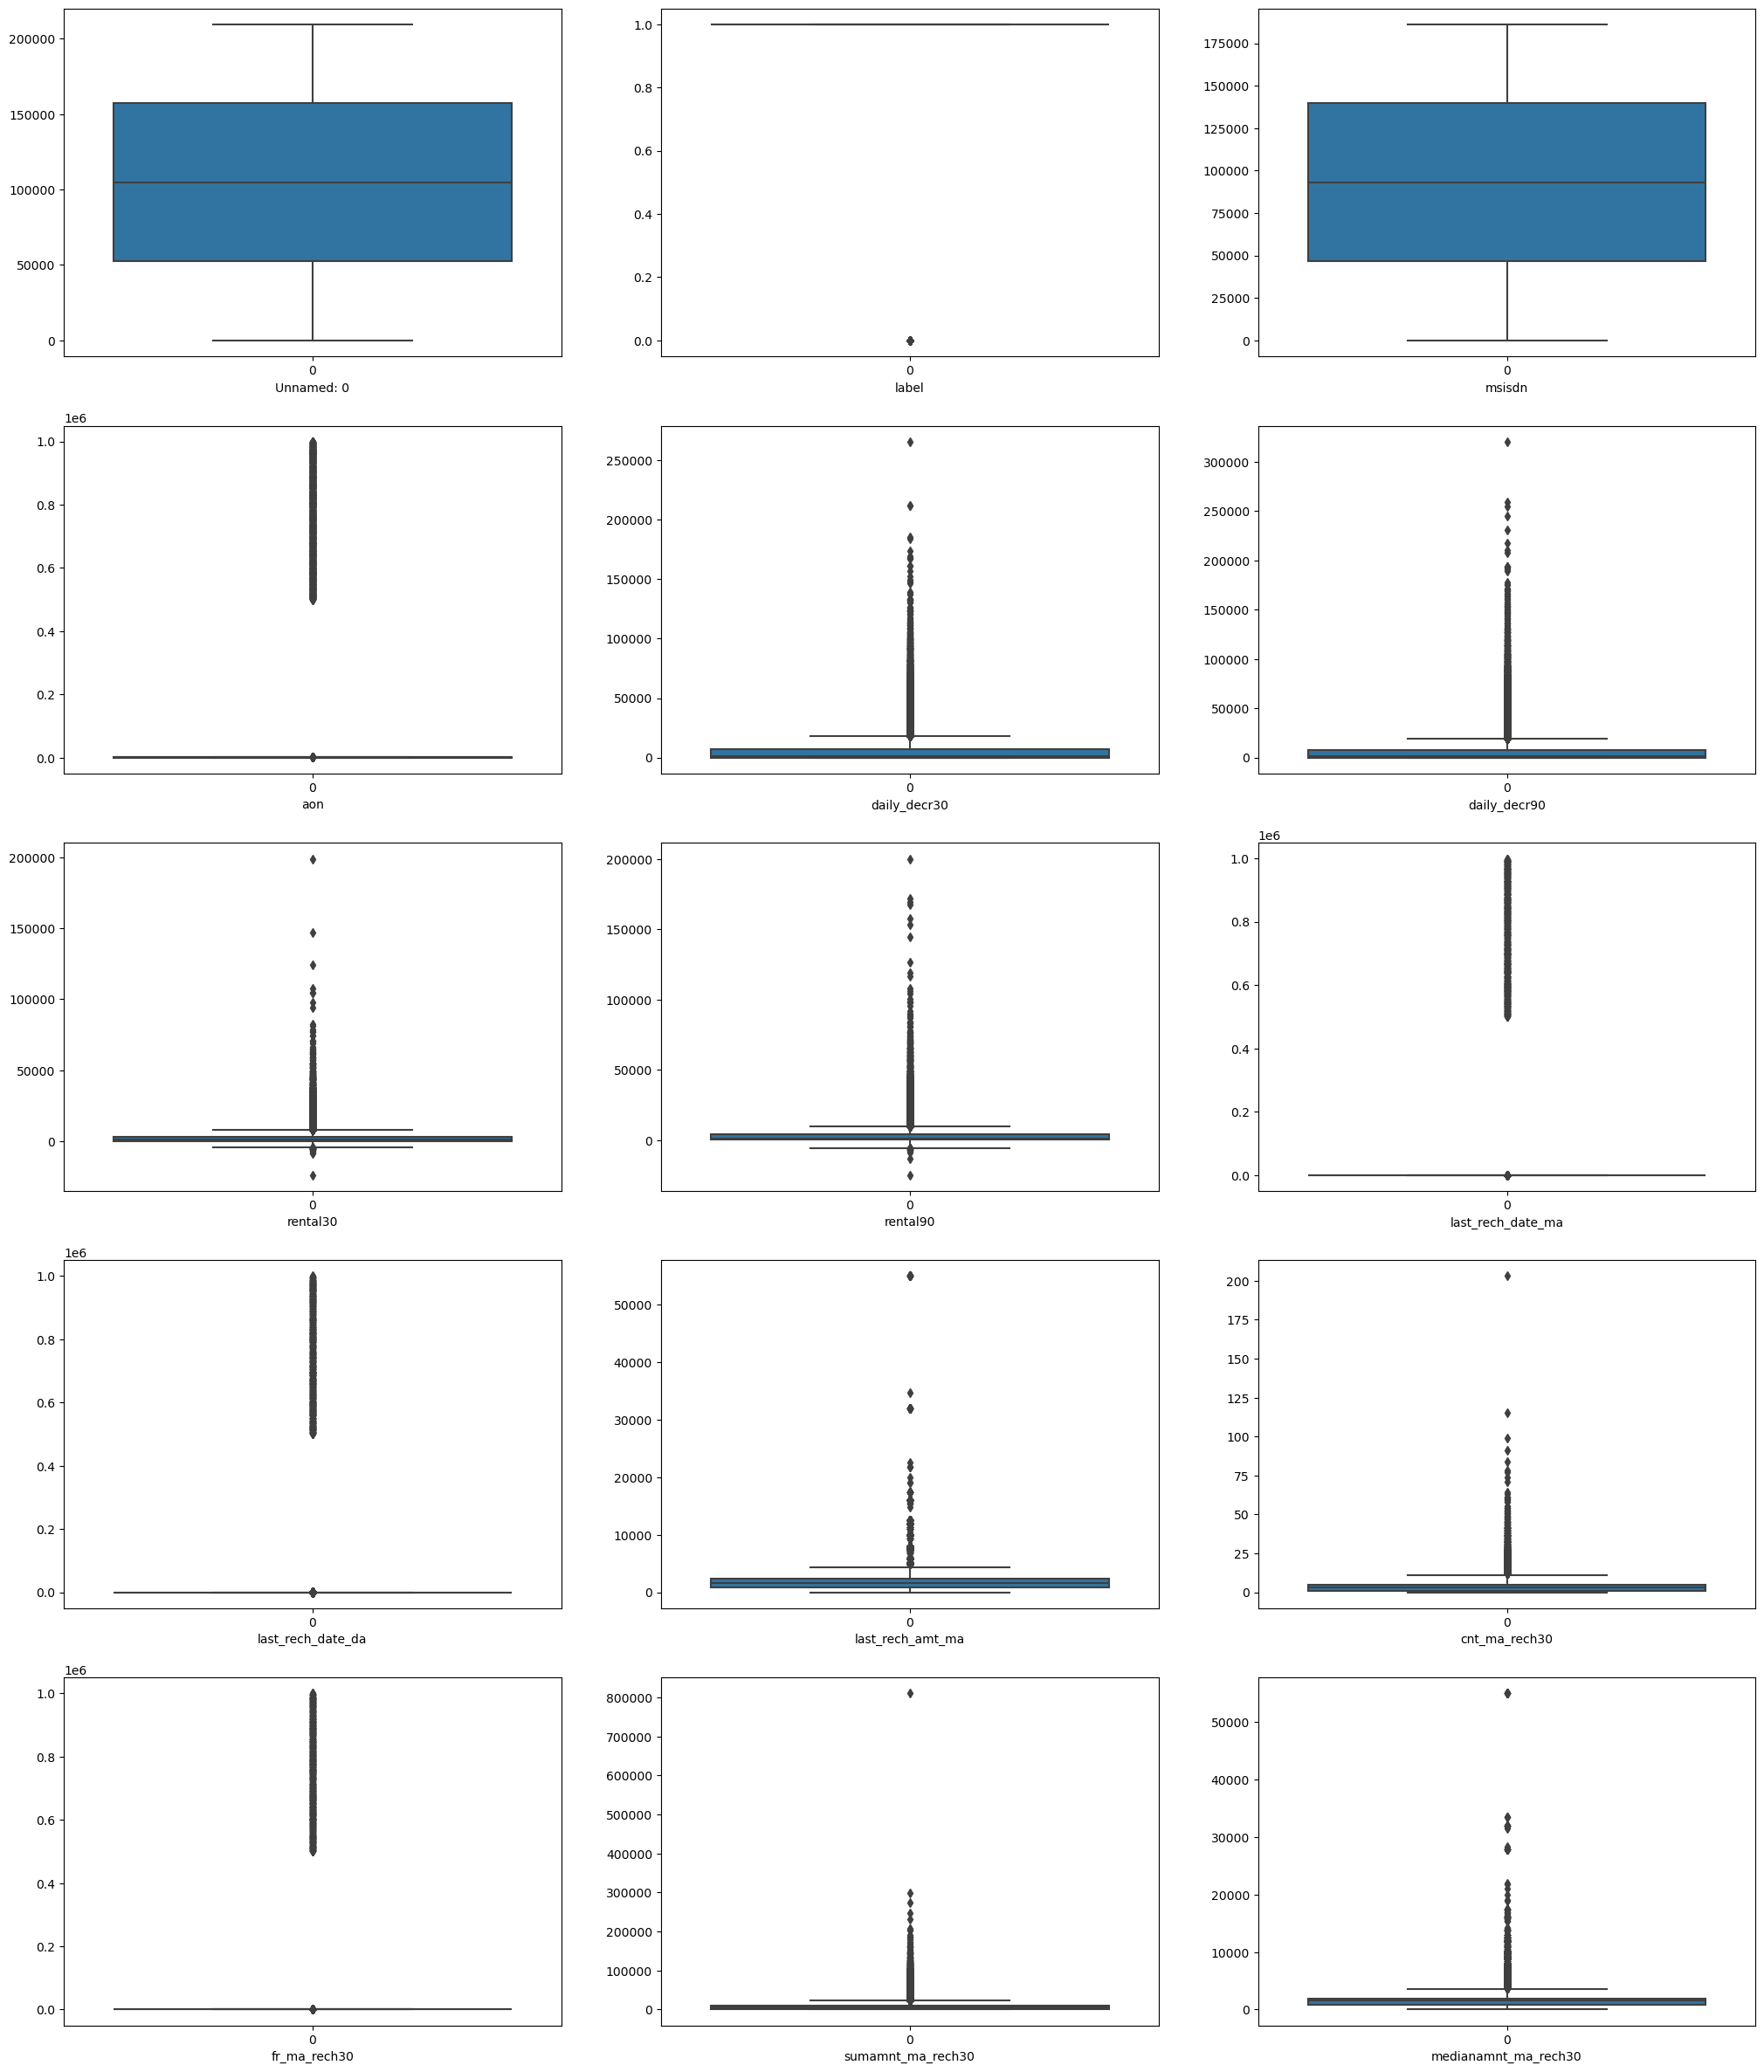

In [10]:
plt.figure(figsize=(25,30))
graph=1
for column in data:
    if graph<=15:
        ax=plt.subplot(5,3,graph)
        sns.boxplot(data[column],orient="v")
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

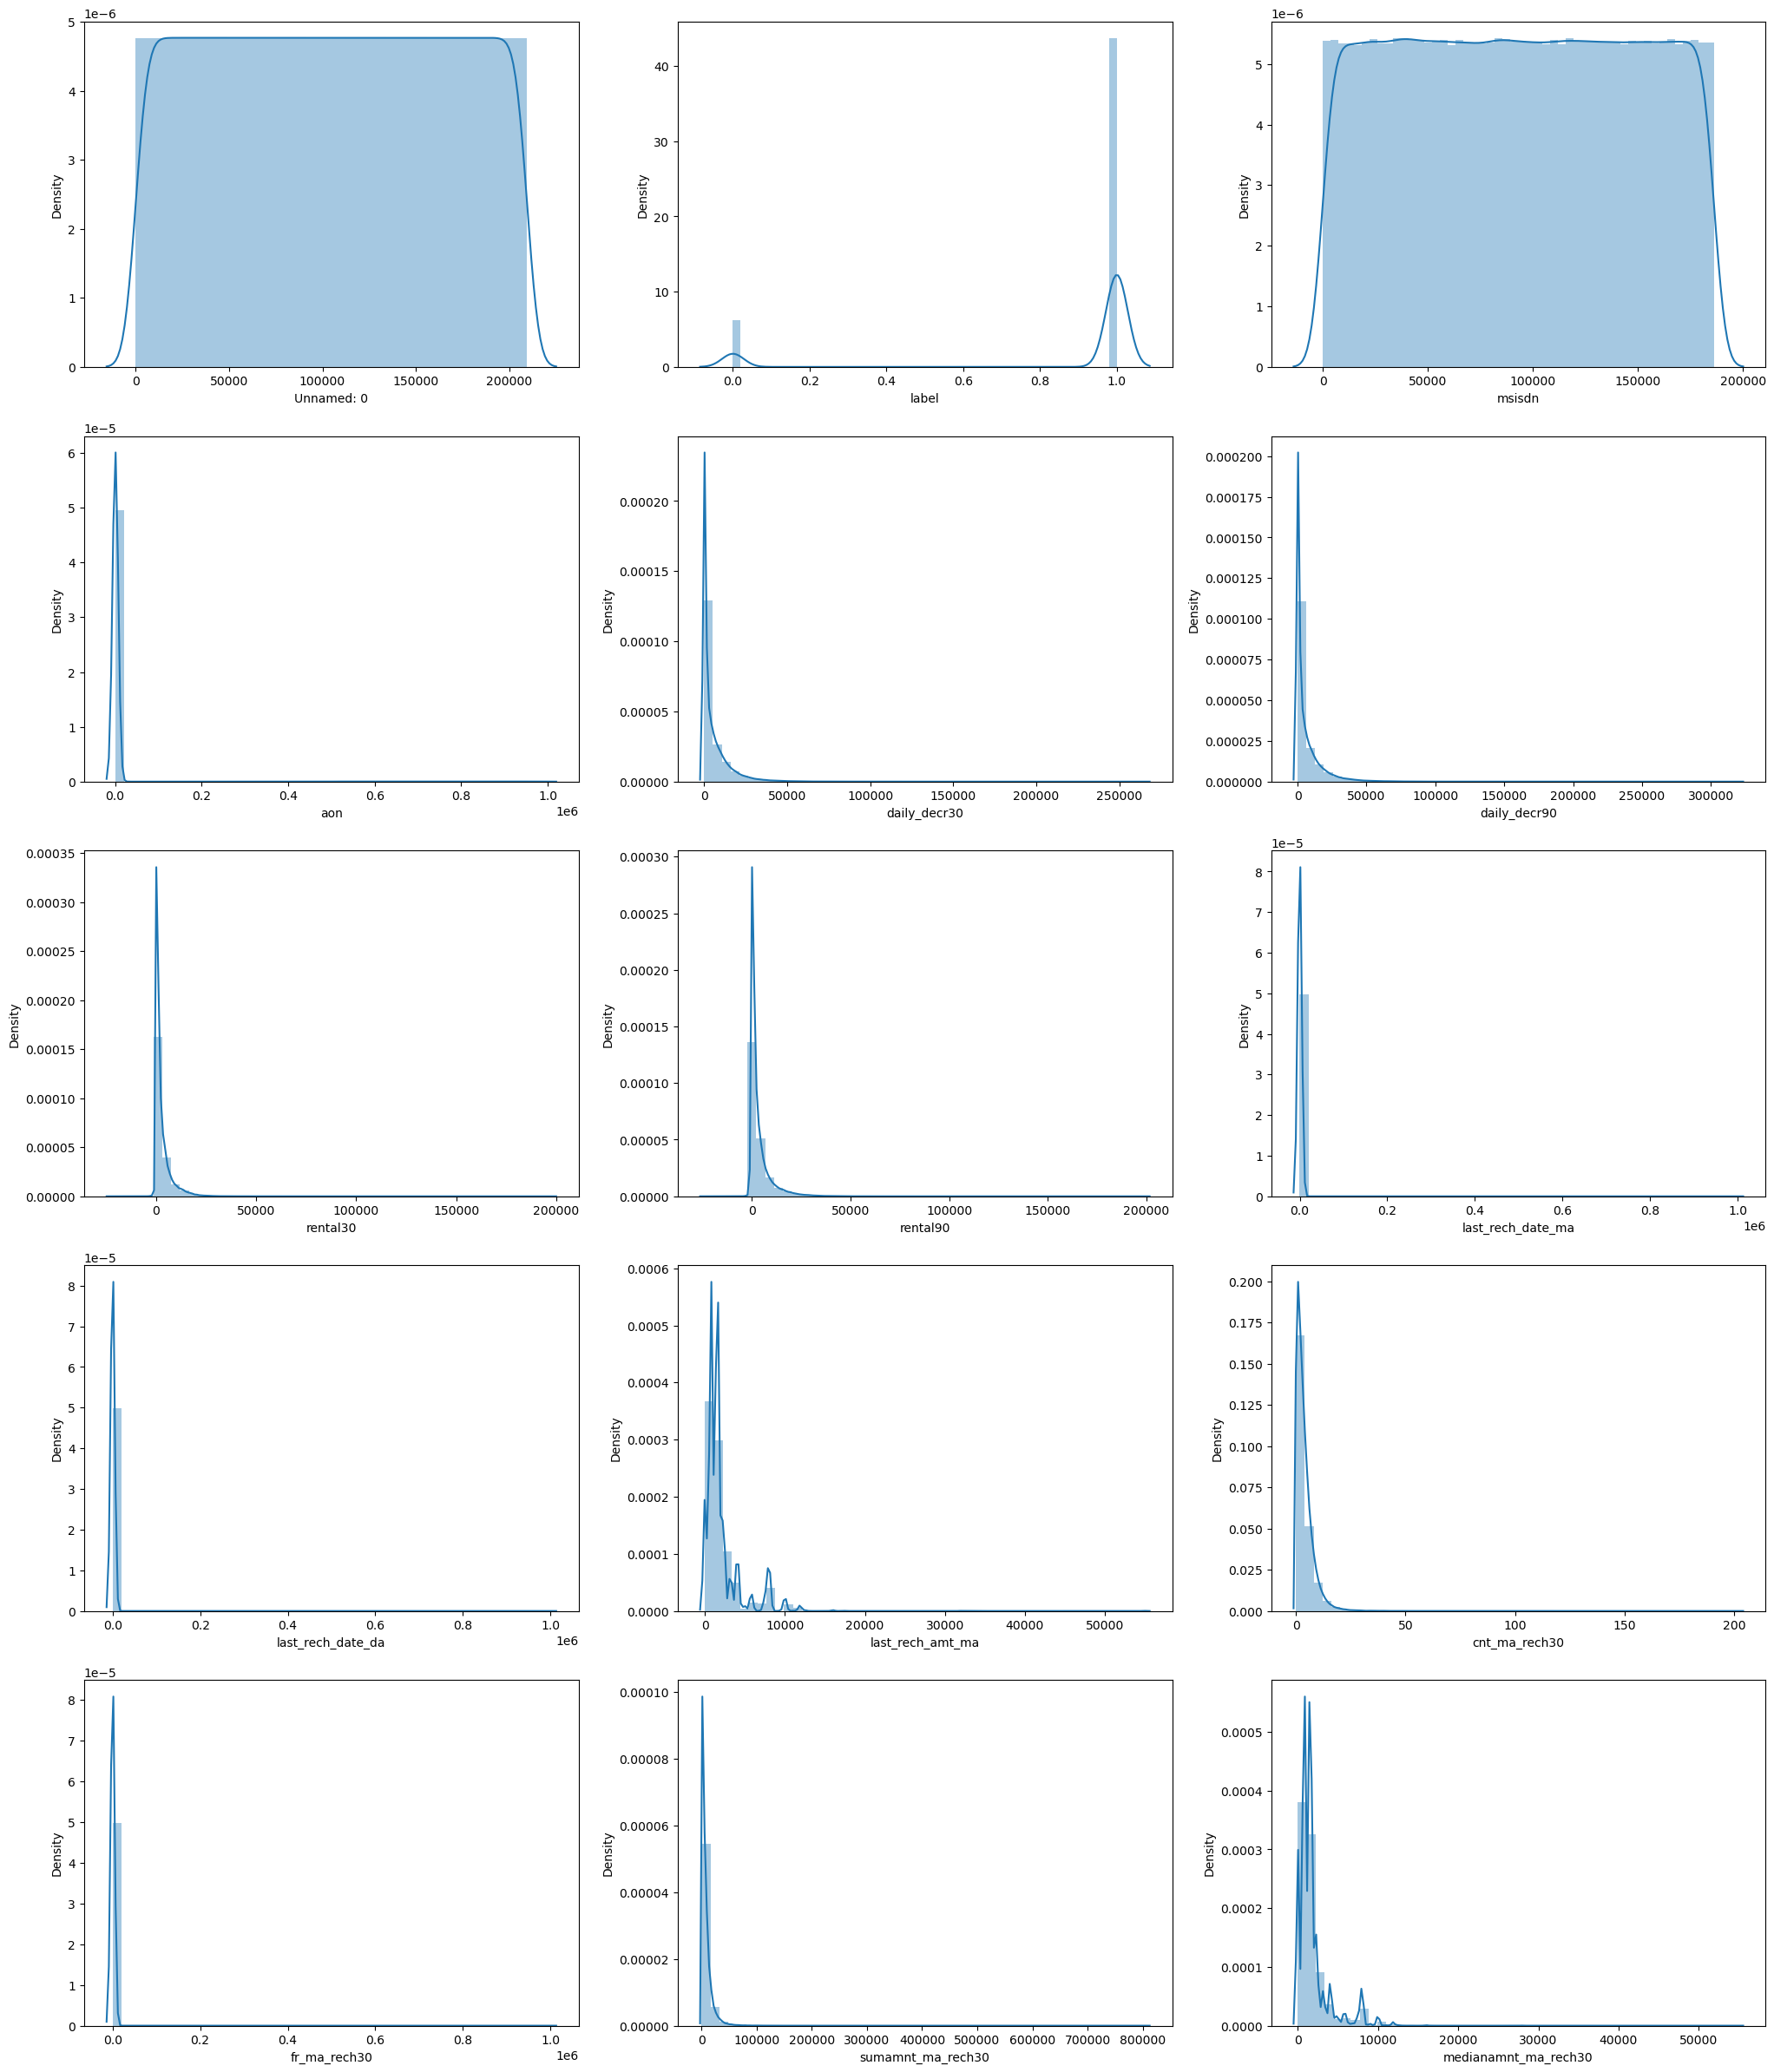

In [11]:
plt.figure(figsize=(25,30))
graph=1
for column in data:
    if graph<=15:
        ax=plt.subplot(5,3,graph)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [9]:
x_features=data.drop(['label','msisdn','pcircle','pdate'],axis=1)
y_features=data['label']

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_features)
x_features=pd.DataFrame(x_scaled,columns=x_features.columns)

In [11]:
y_features

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 209593, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
for i in range(500,600):
    x_train,x_test,y_train,y_test=train_test_split(x_features,y_features,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_x=lr.predict(x_train)
    pred_xt=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_x)*100,1)==round(accuracy_score(y_test,pred_xt)*100,1):
        print("at random state",i,"model performs very well")
        print("training accuracy score is",accuracy_score(y_train,pred_x)*100)
        print("testing accuracy score is",accuracy_score(y_test,pred_xt)*100)

at random state 501 model performs very well
training accuracy score is 87.64328399155504
testing accuracy score is 87.60705169493546
at random state 502 model performs very well
training accuracy score is 87.63910922385104
testing accuracy score is 87.64044943820225
at random state 506 model performs very well
training accuracy score is 87.63970561923733
testing accuracy score is 87.58796727021159
at random state 508 model performs very well
training accuracy score is 87.64388038694133
testing accuracy score is 87.61182280111643
at random state 515 model performs very well
training accuracy score is 87.64865155003162
testing accuracy score is 87.57603950475918
at random state 516 model performs very well
training accuracy score is 87.63135608382933
testing accuracy score is 87.60943724802596
at random state 523 model performs very well
training accuracy score is 87.63433806076077
testing accuracy score is 87.58319616403062
at random state 527 model performs very well
training accuracy

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x_features,y_features,test_size=0.2,random_state=502)

In [15]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print("training outcome",y_train.value_counts())

training outcome label
1    146736
0     20938
Name: count, dtype: int64


In [16]:
ove_smpl=SMOTE()
x_trainns,y_trainns=ove_smpl.fit_resample(x_train,y_train)
print("no. of ones before is",format(Counter(y_train)))
print("no.of ones after is",format(Counter(y_trainns)))

no. of ones before is Counter({1: 146736, 0: 20938})
no.of ones after is Counter({1: 146736, 0: 146736})


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [18]:
from sklearn.metrics import confusion_matrix,classification_report,precision_score,accuracy_score,recall_score,f1_score,roc_auc_score
lr=LogisticRegression()
lr.fit(x_trainns,y_trainns)
yu=lr.predict(x_test)
print("accuracy score",accuracy_score(y_test,yu))
print("classification_report",classification_report(y_test,yu))
print("confusion_matrix",confusion_matrix(y_test,yu))
print("precision_score",precision_score(y_test,yu))
print("recall_score",recall_score(y_test,yu))
print("f1_score",f1_score(y_test,yu))
print("roc_auc_score",roc_auc_score(y_test,yu))

accuracy score 0.7188625682864572
classification_report               precision    recall  f1-score   support

           0       0.28      0.81      0.42      5224
           1       0.96      0.71      0.81     36695

    accuracy                           0.72     41919
   macro avg       0.62      0.76      0.62     41919
weighted avg       0.88      0.72      0.77     41919

confusion_matrix [[ 4220  1004]
 [10781 25914]]
precision_score 0.9627015380043094
recall_score 0.7061997547349775
f1_score 0.8147391256504173
roc_auc_score 0.7570049309662635


In [19]:
dt=DecisionTreeClassifier()
dt.fit(x_trainns,y_trainns)
u=dt.predict(x_test)
print("accuracy score",accuracy_score(y_test,u))
print("classification_report",classification_report(y_test,u))
print("confusion_matrix",confusion_matrix(y_test,u))
print("precision_score",precision_score(y_test,u))
print("recall_score",recall_score(y_test,u))
print("f1_score",f1_score(y_test,u))
print("roc_auc_score",roc_auc_score(y_test,u))

accuracy score 0.8441518165986784
classification_report               precision    recall  f1-score   support

           0       0.41      0.55      0.47      5224
           1       0.93      0.89      0.91     36695

    accuracy                           0.84     41919
   macro avg       0.67      0.72      0.69     41919
weighted avg       0.87      0.84      0.85     41919

confusion_matrix [[ 2874  2350]
 [ 4183 32512]]
precision_score 0.9325913602202972
recall_score 0.8860062678839079
f1_score 0.9087021535279568
roc_auc_score 0.7180797036203612


In [20]:
rf=RandomForestClassifier()
rf.fit(x_trainns,y_trainns)
u=rf.predict(x_test)
print("accuracy score",accuracy_score(y_test,u))
print("classification_report",classification_report(y_test,u))
print("confusion_matrix",confusion_matrix(y_test,u))
print("precision_score",precision_score(y_test,u))
print("recall_score",recall_score(y_test,u))
print("f1_score",f1_score(y_test,u))
print("roc_auc_score",roc_auc_score(y_test,u))

accuracy score 0.897087239676519
classification_report               precision    recall  f1-score   support

           0       0.59      0.58      0.58      5224
           1       0.94      0.94      0.94     36695

    accuracy                           0.90     41919
   macro avg       0.76      0.76      0.76     41919
weighted avg       0.90      0.90      0.90     41919

confusion_matrix [[ 3037  2187]
 [ 2127 34568]]
precision_score 0.9404978914433411
recall_score 0.9420356996866058
f1_score 0.9412661674608578
roc_auc_score 0.761695491497208


In [25]:
pip install xgboost

In [21]:
from xgboost import XGBClassifier

In [22]:
xg=XGBClassifier()
xg.fit(x_trainns,y_trainns)
u=xg.predict(x_test)
print("accuracy score",accuracy_score(y_test,u))
print("classification_report",classification_report(y_test,u))
print("confusion_matrix",confusion_matrix(y_test,u))
print("precision_score",precision_score(y_test,u))
print("recall_score",recall_score(y_test,u))
print("f1_score",f1_score(y_test,u))
print("roc_auc_score",roc_auc_score(y_test,u))

accuracy score 0.8904076910231637
classification_report               precision    recall  f1-score   support

           0       0.56      0.60      0.58      5224
           1       0.94      0.93      0.94     36695

    accuracy                           0.89     41919
   macro avg       0.75      0.77      0.76     41919
weighted avg       0.89      0.89      0.89     41919

confusion_matrix [[ 3144  2080]
 [ 2514 34181]]
precision_score 0.9426380960260334
recall_score 0.9314893037198528
f1_score 0.9370305389549866
roc_auc_score 0.7666634880008146


In [23]:
from sklearn.model_selection import cross_val_score
abc=cross_val_score(lr,x_features,y_features,cv=5)
print(abc.mean()*100)

87.63174319949286


In [24]:
from sklearn.model_selection import cross_val_score
abc=cross_val_score(dt,x_features,y_features,cv=5)
print(abc.mean()*100)

76.89518519274915


In [25]:
from sklearn.model_selection import GridSearchCV
X_train,x_test,Y_train,y_test=train_test_split(x_features,y_features,test_size=.20,random_state=502)
params={'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
       }
GCV2=GridSearchCV(dt,param_grid=params)
GCV2.fit(X_train,Y_train)
print(GCV2.best_params_)
rf=GCV2.best_estimator_
rf.fit(x_train,y_train)
oo=rf.predict(x_test)
rab=confusion_matrix(y_test,oo)
print("accuracy",accuracy_score(y_test,oo))

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
accuracy 0.9087525942889859


In [26]:
import joblib
joblib.dump(GCV2.best_estimator_,'loan.pkl')
model=joblib.load('loan.pkl')
y_pred=model.predict(x_test)
predicted=pd.DataFrame(y_pred,columns=['predicted'])
predicted

,predicted
0,1
1,1
2,1
3,1
4,1
...,...
41914,1
41915,1
41916,1
41917,1


In [29]:
predicted['predicted'].unique()

array([1, 0], dtype=int64)